# Exploring the UTx000 Extension Beacon Data
(Known as BPEACE2 in the [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons.

# Package Import

In [1]:
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

# Data Import

In [2]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_4,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-01 17:15:00,0.0,400.0,-100.0,-100.0,-100.0,669362.437500,22.0,55.250000,-0.1,-100.0,...,45.066567,45.351743,5.528357,13.813757,20.262206,21.551901,30,idbkjh8u,22,4
2020-06-01 17:20:00,0.0,400.0,-100.0,-100.0,-100.0,40906.066667,22.0,54.166667,-0.1,-100.0,...,42.536739,42.735695,5.247584,11.059922,15.519927,16.411934,30,idbkjh8u,22,4
2020-06-01 17:25:00,0.0,400.0,-100.0,-100.0,-100.0,22156.680000,23.0,53.000000,-0.1,-100.0,...,37.865118,38.020652,4.680348,9.237404,12.707863,13.401960,30,idbkjh8u,22,4
2020-06-01 17:30:00,0.0,400.0,-100.0,-100.0,-100.0,15907.500000,23.0,52.000000,-0.1,-100.0,...,41.361894,41.520351,5.117388,9.768085,13.294004,13.999194,30,idbkjh8u,22,4
2020-06-01 17:35:00,0.0,400.0,-100.0,-100.0,-100.0,12495.000000,23.0,51.960000,-0.1,-100.0,...,40.015350,40.204947,4.935506,10.472929,14.724953,15.575364,30,idbkjh8u,22,4


## Base Visualization
Here we look at the raw, unaltered data in order to ascertain:
- what data are available? (see 4.1.1 notebook to see when participants actually measured data)
- what are typical measurements and what does this say?
- are there any misbehaving sensors?

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Heatmap

Working for PM_C_2p5
	Data collected
	Plotting


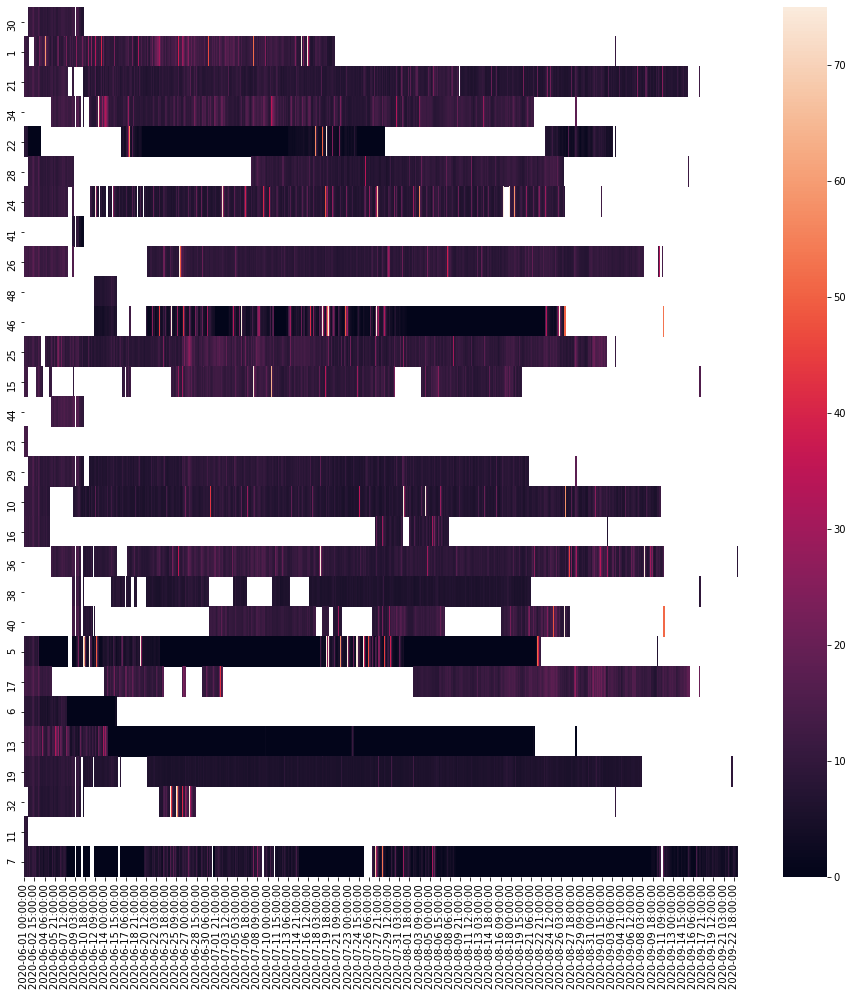

Working for CO2
	Data collected
	Plotting


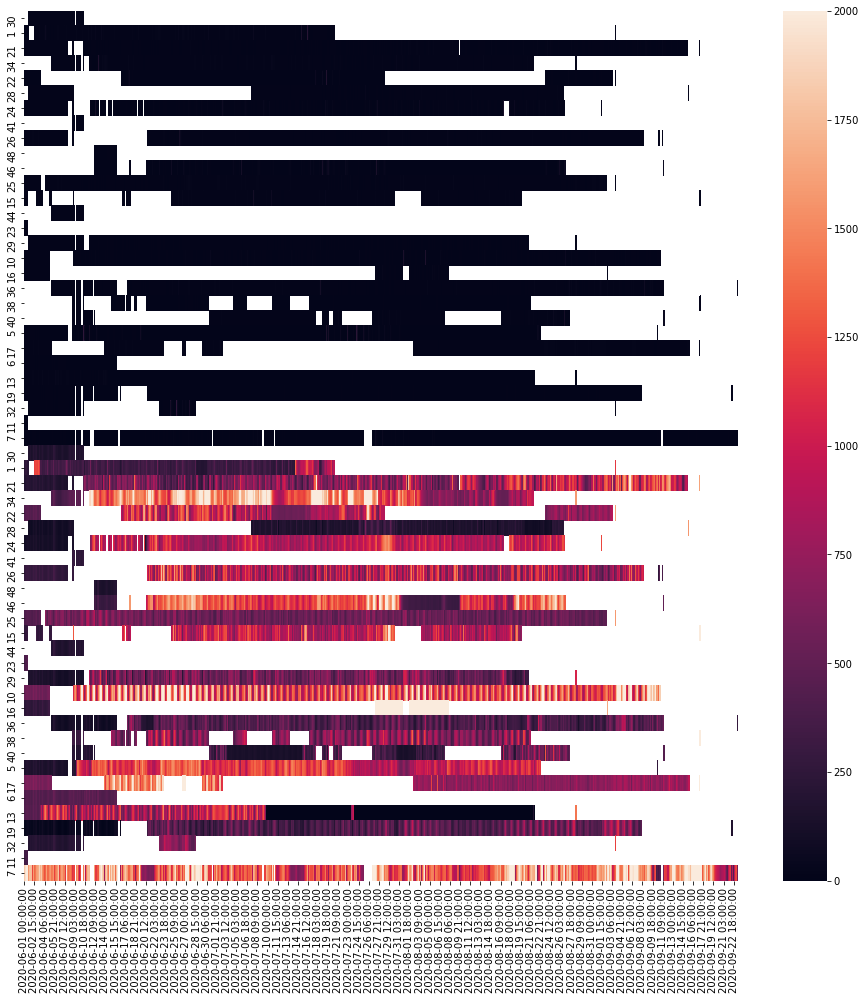

Working for CO
	Data collected
	Plotting


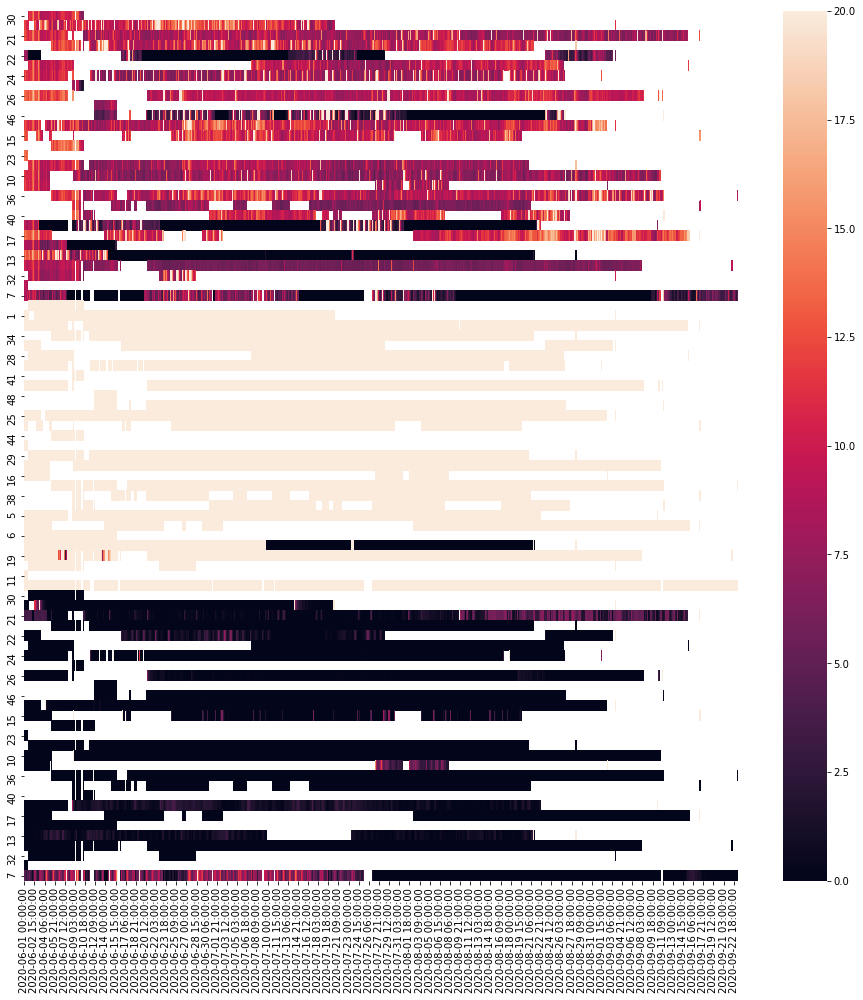

Working for NO2
	Data collected
	Plotting


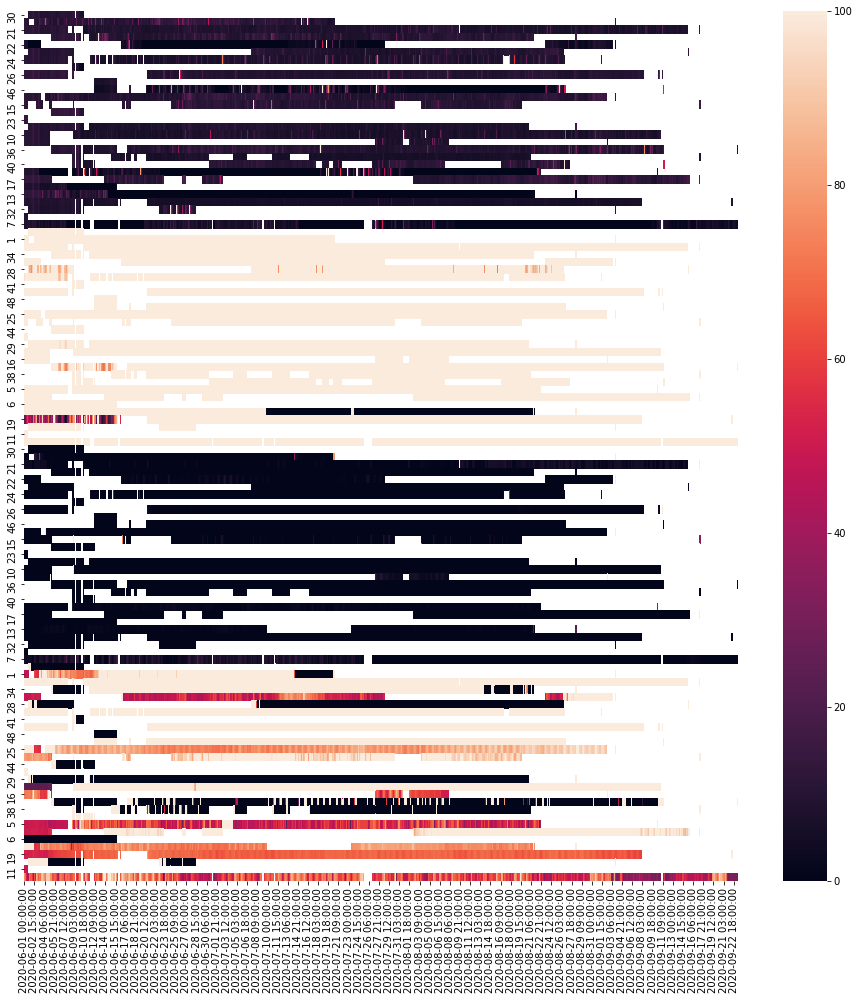

Working for T_NO2
	Data collected
	Plotting


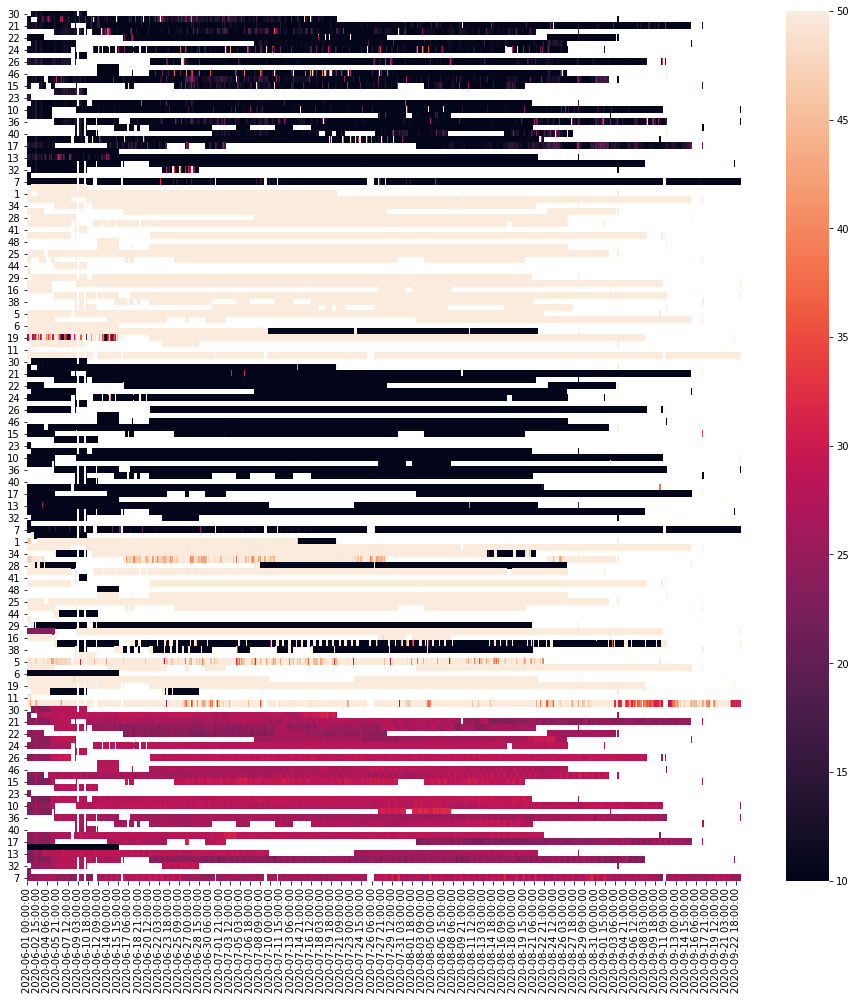

In [5]:
heatmap_df = pd.DataFrame()
var_list = ['PM_C_2p5','CO2','CO','NO2','T_NO2']
limit_list = [[0,75],[0,2000],[0,20],[0,100],[10,50]]
for variable, limits in zip(var_list, limit_list):
    print(f'Working for {variable}')
    for beacon in beacon_data['Beacon'].unique():
        data_by_beacon = beacon_data[beacon_data['Beacon'] == beacon]
        data_by_beacon = data_by_beacon.resample('1h').mean()
        data_by_beacon = data_by_beacon[datetime(2020,6,1):datetime(2020,9,24)]
        heatmap_df = pd.concat([heatmap_df,data_by_beacon[variable]],axis=1)
        heatmap_df.rename(columns={variable:beacon}, inplace=True)

    print(f'\tData collected')
    fig, ax = plt.subplots(figsize=(16,16))
    df_to_plot = heatmap_df.T
    print(f'\tPlotting')
    sns.heatmap(df_to_plot,vmin=limits[0],vmax=limits[1])
    
    plt.show()
    plt.close()